# Image Claasiciation using Conv2D

datasourse : 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'

### Inspect the Hardware resources

In [ ]:
# Display the Hardware Resources

print('Available GPU\n')

!nvidia-smi -L

print('\nAvailable RAM\n')

!cat /proc/meminfo | grep 'MemAvailable' | awk '{print $2/1024/1024 " GB"}'

Available GPU

GPU 0: Tesla T4 (UUID: GPU-84da5b19-6e7c-1bbc-0e8a-d46e309fb23e)

Available RAM

11.6256 GB


### Set up Notebook Environment

- Set up the version control - from requirement.txt file
- import the common libraries
- import the personal helper functions

In [ ]:
!wget https://raw.githubusercontent.com/rahulrajpr/references/main/requirements_tf_cert_exam.txt

--2023-03-16 16:39:30--  https://raw.githubusercontent.com/rahulrajpr/references/main/requirements_tf_cert_exam.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87 [text/plain]
Saving to: ‘requirements_tf_cert_exam.txt’

requirements_tf_cer 100%[===================>]      87  --.-KB/s    in 0s      

2023-03-16 16:39:30 (3.03 MB/s) - ‘requirements_tf_cert_exam.txt’ saved [87/87]



In [ ]:
from IPython.core.display import clear_output

!pip install -r requirements_tf_cert_exam.txt # version control - installing the required libraries for the tf cert exam

clear_output()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import scipy
import warnings
warnings.filterwarnings('ignore')

In [ ]:
print(f'tensorflow version : {tf.__version__}')
print(f'pandas version : {pd.__version__}')
print(f'numpy version : {np.__version__}')
print(f'scipy version : {scipy.__version__}')
print(f'tensorflow version : {tf.__version__}')

tensorflow version : 2.10.0
pandas version : 1.4.2
numpy version : 1.22.4
scipy version : 1.7.3
tensorflow version : 2.10.0


### Lets get the helperfucntion for faster coding

In [ ]:
!wget https://raw.githubusercontent.com/rahulrajpr/references/main/helper_functions.py

--2023-03-16 16:40:46--  https://raw.githubusercontent.com/rahulrajpr/references/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17582 (17K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  17.17K  --.-KB/s    in 0.001s  

2023-03-16 16:40:46 (21.7 MB/s) - ‘helper_functions.py’ saved [17582/17582]



In [ ]:
from helper_functions import unzip_untar_data, walk_through_dir,plot_loss_curves,plot_random_image_from_dir

In [ ]:
!wget 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'

--2023-03-16 16:40:47--  https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 74.125.135.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228813984 (218M) [application/x-compressed-tar]
Saving to: ‘flower_photos.tgz’

flower_photos.tgz   100%[===================>] 218.21M  91.0MB/s    in 2.4s    

2023-03-16 16:40:49 (91.0 MB/s) - ‘flower_photos.tgz’ saved [228813984/228813984]



In [ ]:
unzip_untar_data('flower_photos.tgz')

File extension : .tgz
File extracting.......
Completed successfully


In [ ]:
!ls

flower_photos	   helper_functions.py	requirements_tf_cert_exam.txt
flower_photos.tgz  __pycache__		sample_data


In [ ]:
# Display the Hardware Resources - right now

print('Available GPU\n')

!nvidia-smi -L

print('\nAvailable RAM\n')

!cat /proc/meminfo | grep 'MemAvailable' | awk '{print $2/1024/1024 " GB"}'

Available GPU

GPU 0: Tesla T4 (UUID: GPU-84da5b19-6e7c-1bbc-0e8a-d46e309fb23e)

Available RAM

11.5435 GB


### walkthroug the dataset

In [ ]:
walk_through_dir('flower_photos')

There are 5 directories and 1 images in 'flower_photos'.
There are 0 directories and 898 images in 'flower_photos/dandelion'.
There are 0 directories and 799 images in 'flower_photos/tulips'.
There are 0 directories and 633 images in 'flower_photos/daisy'.
There are 0 directories and 699 images in 'flower_photos/sunflowers'.
There are 0 directories and 641 images in 'flower_photos/roses'.


In [ ]:
data_dir = 'flower_photos'

In [ ]:
from helper_functions import plot_random_image_from_dir

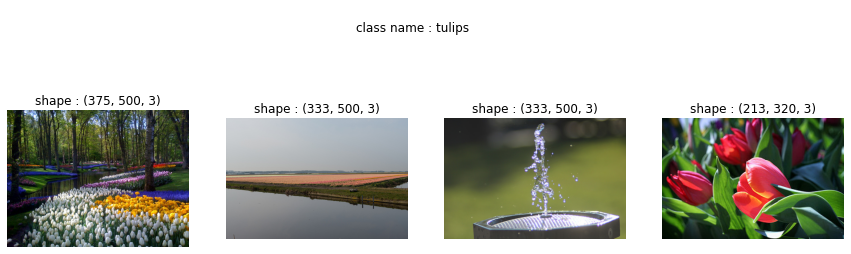

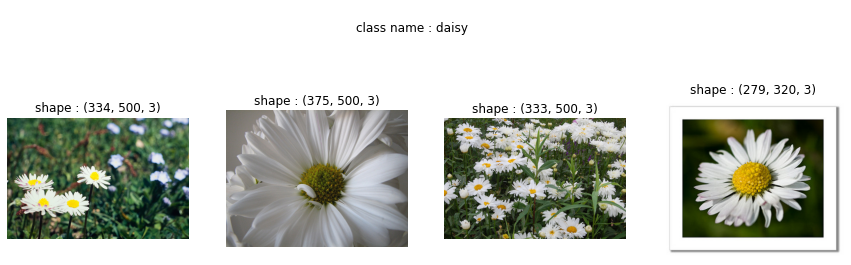

In [ ]:
plot_random_image_from_dir(data_dir)

### Reading the images from the directory

- create train and val datasets in tf.data.Dataset format

In [ ]:
BATCH_SIZE = 24 # making the batch size as 24 as the colab memory is crashing
IMG_SIZE = (224,224)

In [ ]:
# create train data and validation data

train_data = tf.keras.utils.image_dataset_from_directory(directory = data_dir,
                                                         image_size = IMG_SIZE,
                                                         label_mode = 'categorical',
                                                         batch_size = BATCH_SIZE,
                                                         seed = 123,
                                                         shuffle = True,
                                                         subset = 'training',
                                                         validation_split= 0.2)

val_data = tf.keras.utils.image_dataset_from_directory(directory = data_dir,
                                                       label_mode = 'categorical',
                                                       image_size = IMG_SIZE,
                                                       batch_size = BATCH_SIZE,
                                                       seed = 123,
                                                       shuffle = True,
                                                       subset = 'validation',
                                                       validation_split= 0.2)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
# Display the Hardware Resources - right now

print('Available GPU\n')

!nvidia-smi -L

print('\nAvailable RAM\n')

!cat /proc/meminfo | grep 'MemAvailable' | awk '{print $2/1024/1024 " GB"}'

Available GPU

GPU 0: Tesla T4 (UUID: GPU-84da5b19-6e7c-1bbc-0e8a-d46e309fb23e)

Available RAM

10.8845 GB


### Get the shape of the dataset

In [ ]:
type(train_data), train_data.element_spec

(tensorflow.python.data.ops.dataset_ops.BatchDataset,
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)))

Inference : The target labels are OneHot Encoded

### Get the class Names

In [ ]:
class_names = train_data.class_names
num_classes = len(class_names)
num_classes, class_names

(5, ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips'])

### Prefetch the Dataset for faster loading

In [ ]:
train_data = train_data.shuffle(buffer_size = 1000, seed = 123,).prefetch(tf.data.AUTOTUNE) # shuffle the train data
val_data = val_data.prefetch(tf.data.AUTOTUNE) # do not shuffle the validation data

In [ ]:
type(train_data), train_data.element_spec

(tensorflow.python.data.ops.dataset_ops.PrefetchDataset,
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)))

### Create normalization leyer for images

Neural Networks prefer the normalisation for the faster convergence of the algorithm

rescaling_factor = 1.0/255.0

In [ ]:
from tensorflow.keras import layers

In [ ]:
normalization_layer = layers.Rescaling(scale = 1.0/255.0)

> lets test the normalisation layer

In [ ]:
normalized_train_data = train_data.map(lambda x,y: (normalization_layer(x),y))
normalized_train_data

<MapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [ ]:
type(normalized_train_data), normalized_train_data.element_spec

(tensorflow.python.data.ops.dataset_ops.MapDataset,
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)))

In [ ]:
for values, labels in normalized_train_data:
  print(values[:1])
  print(labels[:1])
  break

tf.Tensor(
[[[[0.5694678  0.58501405 0.25140056]
   [0.55087036 0.5632253  0.24820931]
   [0.5028511  0.5094738  0.22717088]
   ...
   [0.12605049 0.13992596 0.10169049]
   [0.16185589 0.1608753  0.07588042]
   [0.2654062  0.24593839 0.08193278]]

  [[0.59467787 0.6051821  0.26358545]
   [0.5721189  0.57778114 0.25709286]
   [0.5205883  0.5243898  0.23542419]
   ...
   [0.13667472 0.14718892 0.08644444]
   [0.16167541 0.16480646 0.06810728]
   [0.22759105 0.21190476 0.07184874]]

  [[0.6163866  0.6156863  0.26918772]
   [0.58557427 0.589936   0.26049423]
   [0.53044224 0.532493   0.24002603]
   ...
   [0.16703682 0.17970188 0.08389348]
   [0.17267928 0.17871144 0.07380963]
   [0.18907565 0.17408966 0.08305322]]

  ...

  [[0.1382356  0.13179304 0.05966402]
   [0.09740922 0.08733519 0.03644472]
   [0.0679974  0.05603261 0.02416979]
   ...
   [0.08241282 0.0838134  0.04465783]
   [0.05081011 0.05473168 0.0309422 ]
   [0.03067226 0.03459383 0.01498599]]

  [[0.01918814 0.02184915 0.005042

### Create Checkpoint Callback Function

In [ ]:
from helper_functions import create_model_checkpoint

### Model1

In [ ]:
IMG_SIZE = (224,224)
COLOR_CHANNEL = (3,)

INPUT_SHAPE = IMG_SIZE+COLOR_CHANNEL

RESCALE = 1.0/255.0

INPUT_SHAPE, RESCALE

((224, 224, 3), 0.00392156862745098)

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
# buidling the model

tf.random.set_seed(42)

inputs = tf.keras.Input(shape = (224,224,3), dtype=tf.float16, name='input_layer')

normalized_inputs = layers.Rescaling(scale = RESCALE, input_shape = INPUT_SHAPE)(inputs)

x = layers.Conv2D(filters = 16, kernel_size = 5, padding = 'valid', activation = 'relu')(normalized_inputs)
x = layers.MaxPool2D()(x)
x = layers.Conv2D(filters = 32, kernel_size = 5, padding = 'valid', activation = 'relu')(x)
x = layers.MaxPool2D()(x)
x = layers.Conv2D(filters = 32,kernel_size = 5, padding = 'valid', activation = 'relu')(x)
x = layers.MaxPool2D()(x)
x = layers.Conv2D(filters = 64,kernel_size = 5, padding = 'valid', activation = 'relu')(x)
x = layers.MaxPool2D()(x)
x = layers.Flatten()(x)
x = layers.Dense(units = 128, activation = 'relu')(x)

outputs = layers.Dense(units = num_classes, activation = 'softmax', name = 'output_layer')(x)
model_1 = tf.keras.Model(inputs,outputs, name = 'model_1')

# compile the model

model_1.compile(loss = tf.keras.losses.categorical_crossentropy,
                optimizer = Adam(),
                metrics = ['accuracy'])

model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 220, 220, 16)      1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 106, 106, 32)      12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 32)       0         
 2D)                                                       

In [ ]:
# fit the model

history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch= len(train_data),
                        validation_data = val_data,
                        validation_steps = int(0.25 * len(val_data)),
                        callbacks = [create_model_checkpoint(model_name = model_1.name)]
                        )

Epoch 1/5
123/123 [==============================] - 24s 41ms/step - loss: 1.4447 - accuracy: 0.3532 - val_loss: 1.1368 - val_accuracy: 0.4821
Epoch 2/5
123/123 [==============================] - 9s 31ms/step - loss: 1.0980 - accuracy: 0.5416 - val_loss: 0.9994 - val_accuracy: 0.5655
Epoch 3/5
123/123 [==============================] - 11s 37ms/step - loss: 0.9260 - accuracy: 0.6253 - val_loss: 1.1231 - val_accuracy: 0.5179
Epoch 4/5
123/123 [==============================] - 8s 31ms/step - loss: 0.8178 - accuracy: 0.6795 - val_loss: 0.8447 - val_accuracy: 0.6310
Epoch 5/5
123/123 [==============================] - 10s 32ms/step - loss: 0.7241 - accuracy: 0.7180 - val_loss: 0.8047 - val_accuracy: 0.6429


In [ ]:
# Display the Hardware Resources - right now

print('Available GPU\n')

!nvidia-smi -L

print('\nAvailable RAM\n')

!cat /proc/meminfo | grep 'MemAvailable' | awk '{print $2/1024/1024 " GB"}'

Available GPU

GPU 0: Tesla T4 (UUID: GPU-84da5b19-6e7c-1bbc-0e8a-d46e309fb23e)

Available RAM

5.33696 GB


In [ ]:
from helper_functions import clear_memory_tensorflow_session

In [ ]:
clear_memory_tensorflow_session()

In [ ]:
# Display the Hardware Resources - right now

print('Available GPU\n')

!nvidia-smi -L

print('\nAvailable RAM\n')

!cat /proc/meminfo | grep 'MemAvailable' | awk '{print $2/1024/1024 " GB"}'

Available GPU

GPU 0: Tesla T4 (UUID: GPU-84da5b19-6e7c-1bbc-0e8a-d46e309fb23e)

Available RAM

6.99615 GB


In [ ]:
from helper_functions import plot_loss_curves

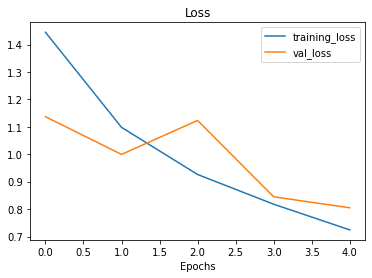

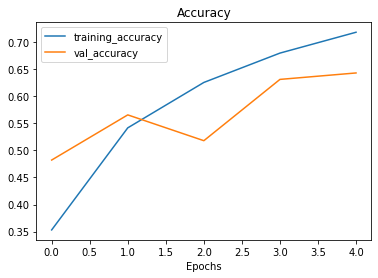

In [ ]:
plot_loss_curves(history_1)

Lets evaluate the model

In [ ]:
model_1.load_weights('/content/checkpoints/model_1.h5')

In [ ]:
model_1.evaluate(val_data)

31/31 [==============================] - 2s 54ms/step - loss: 0.8025 - accuracy: 0.6757


[0.8025451898574829, 0.6757493019104004]

inference : From the loss curves it is clear that the model is overfitting

> Lets try to reduce the overfitting of the model using the 

- Data Augmentation
- Dropouts

In [ ]:
# lets create fata augementation layer (model)

augmentation_layer = tf.keras.models.Sequential([layers.RandomFlip('horizontal'),
                                        layers.RandomHeight(0.2),
                                        layers.RandomWidth(0.2),
                                        layers.RandomZoom(0.2),
                                        layers.RandomRotation(0.2),
                                        layers.Resizing(IMG_SIZE[0],IMG_SIZE[1])],
                                        name = 'augmentation_layer')

In [ ]:
from helper_functions import augmented_image_random_view

picks image randomly from random classes of the train directory


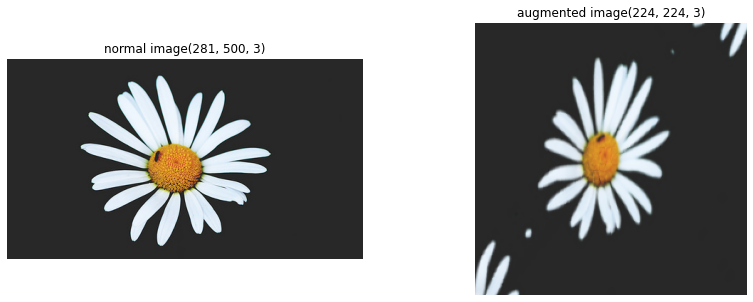

In [ ]:
augmented_image_random_view(train_dir = data_dir, augmentation_model= augmentation_layer)

### Model2 : With Augmentation Layer & Dropout

In [ ]:
inputs = tf.keras.Input(shape = INPUT_SHAPE, dtype = tf.float16, name = 'input_layer')
aug_layer = augmentation_layer(inputs)
rescale_layer = normalization_layer(aug_layer)

x = layers.Conv2D(filters = 16, kernel_size = 5, padding = 'valid', activation = 'relu')(rescale_layer)
x = layers.MaxPool2D()(x)

x = layers.Conv2D(filters = 32, kernel_size = 5, padding = 'valid', activation = 'relu')(x)
x = layers.MaxPool2D()(x)

x = layers.Conv2D(filters = 32, kernel_size = 5, padding = 'valid', activation = 'relu')(x)
x = layers.MaxPool2D()(x)

x = layers.Conv2D(filters = 64, kernel_size = 5, padding = 'valid', activation = 'relu')(x)
x = layers.MaxPool2D()(x)

x = layers.Dropout(0.2)(x)
x = layers.Flatten()(x)

x = layers.Dense(units = 128, activation = 'relu')(x)
outputs = layers.Dense(units = num_classes, activation = 'softmax', name = 'output_layer')(x)

model_2 = tf.keras.Model(inputs,outputs, name = 'model_2')

model_2.compile(loss = tf.keras.losses.categorical_crossentropy,
                optimizer = Adam(),
                metrics = ['accuracy'])

model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 augmentation_layer (Sequent  (None, 224, 224, 3)      0         
 ial)                                                            
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 220, 220, 16)      1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 106, 106, 32)      1283

In [ ]:
history_2 = model_2.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = val_data,
                        validation_steps = int(0.25*len(val_data)),
                        callbacks = [create_model_checkpoint(model_name = model_2.name)])

Epoch 1/5


123/123 [==============================] - 28s 146ms/step - loss: 1.3187 - accuracy: 0.4033 - val_loss: 1.2246 - val_accuracy: 0.4524
Epoch 2/5
123/123 [==============================] - 23s 143ms/step - loss: 1.1560 - accuracy: 0.5136 - val_loss: 1.2607 - val_accuracy: 0.3869
Epoch 3/5
123/123 [==============================] - 25s 144ms/step - loss: 1.0582 - accuracy: 0.5698 - val_loss: 1.0625 - val_accuracy: 0.6190
Epoch 4/5
123/123 [==============================] - 22s 145ms/step - loss: 1.0209 - accuracy: 0.5988 - val_loss: 0.8985 - val_accuracy: 0.6190
Epoch 5/5
123/123 [==============================] - 25s 143ms/step - loss: 0.9364 - accuracy: 0.6342 - val_loss: 0.9333 - val_accuracy: 0.6548


In [ ]:
# Display the Hardware Resources - right now

print('Available GPU\n')

!nvidia-smi -L

print('\nAvailable RAM\n')

!cat /proc/meminfo | grep 'MemAvailable' | awk '{print $2/1024/1024 " GB"}'

Available GPU

GPU 0: Tesla T4 (UUID: GPU-84da5b19-6e7c-1bbc-0e8a-d46e309fb23e)

Available RAM

3.90244 GB


In [ ]:
clear_memory_tensorflow_session()

In [ ]:
# Display the Hardware Resources - right now

print('Available GPU\n')

!nvidia-smi -L

print('\nAvailable RAM\n')

!cat /proc/meminfo | grep 'MemAvailable' | awk '{print $2/1024/1024 " GB"}'

Available GPU

GPU 0: Tesla T4 (UUID: GPU-84da5b19-6e7c-1bbc-0e8a-d46e309fb23e)

Available RAM

6.10924 GB


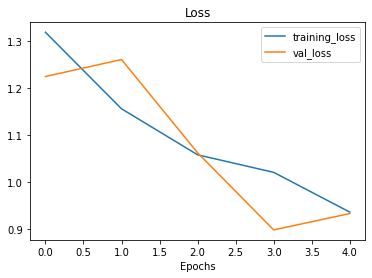

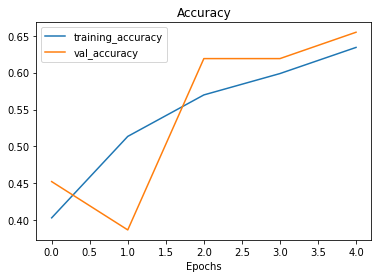

In [ ]:
plot_loss_curves(history_2)

In [ ]:
model_2.load_weights('/content/checkpoints/model_2.h5')

In [ ]:
model_2.evaluate(val_data)

31/31 [==============================] - 1s 32ms/step - loss: 0.9275 - accuracy: 0.6499


[0.9274612069129944, 0.6498637795448303]

### Model 3 : Model 2 modified the CNN with Padding = 'same'

In [ ]:
inputs = tf.keras.Input(shape = INPUT_SHAPE, dtype = tf.float16, name = 'input_layer')
aug_layer = augmentation_layer(inputs)
rescale_layer = normalization_layer(aug_layer)

x = layers.Conv2D(filters = 16, kernel_size = 5, padding = 'same', activation = 'relu')(rescale_layer)
x = layers.MaxPool2D()(x)

x = layers.Conv2D(filters = 32, kernel_size = 5, padding = 'same', activation = 'relu')(x)
x = layers.MaxPool2D()(x)

x = layers.Conv2D(filters = 32, kernel_size = 5, padding = 'same', activation = 'relu')(x)
x = layers.MaxPool2D()(x)

x = layers.Conv2D(filters = 64, kernel_size = 5, padding = 'same', activation = 'relu')(x)
x = layers.MaxPool2D()(x)

x = layers.Dropout(0.2)(x)

x = layers.Flatten()(x)

x = layers.Dense(units = 128, activation = 'relu')(x)
outputs = layers.Dense(units = num_classes, activation = 'softmax', name = 'output_layer')(x)

model_3 = tf.keras.Model(inputs,outputs, name = 'model_3')

model_3.compile(loss = tf.keras.losses.categorical_crossentropy,
                optimizer = Adam(),
                metrics = ['accuracy'])

model_3.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 augmentation_layer (Sequent  (None, 224, 224, 3)      0         
 ial)                                                            
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      1283

In [ ]:
history_3 = model_3.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = val_data,
                        validation_steps = int(0.25*len(val_data)),
                        callbacks = [create_model_checkpoint(model_name = model_3.name)])

Epoch 1/5


123/123 [==============================] - 29s 145ms/step - loss: 1.3572 - accuracy: 0.3696 - val_loss: 1.2879 - val_accuracy: 0.3988
Epoch 2/5
123/123 [==============================] - 22s 144ms/step - loss: 1.1220 - accuracy: 0.5497 - val_loss: 1.0412 - val_accuracy: 0.5298
Epoch 3/5
123/123 [==============================] - 25s 147ms/step - loss: 0.9978 - accuracy: 0.6107 - val_loss: 0.9396 - val_accuracy: 0.6369
Epoch 4/5
123/123 [==============================] - 22s 146ms/step - loss: 0.9258 - accuracy: 0.6352 - val_loss: 0.8611 - val_accuracy: 0.6667
Epoch 5/5
123/123 [==============================] - 25s 147ms/step - loss: 0.8703 - accuracy: 0.6621 - val_loss: 0.7921 - val_accuracy: 0.6845


In [ ]:
# Display the Hardware Resources - right now

print('Available GPU\n')

!nvidia-smi -L

print('\nAvailable RAM\n')

!cat /proc/meminfo | grep 'MemAvailable' | awk '{print $2/1024/1024 " GB"}'

Available GPU

GPU 0: Tesla T4 (UUID: GPU-84da5b19-6e7c-1bbc-0e8a-d46e309fb23e)

Available RAM

4.19586 GB


In [ ]:
clear_memory_tensorflow_session()

In [ ]:
# Display the Hardware Resources - right now

print('Available GPU\n')

!nvidia-smi -L

print('\nAvailable RAM\n')

!cat /proc/meminfo | grep 'MemAvailable' | awk '{print $2/1024/1024 " GB"}'

Available GPU

GPU 0: Tesla T4 (UUID: GPU-84da5b19-6e7c-1bbc-0e8a-d46e309fb23e)

Available RAM

6.7313 GB


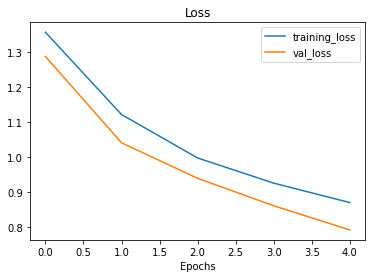

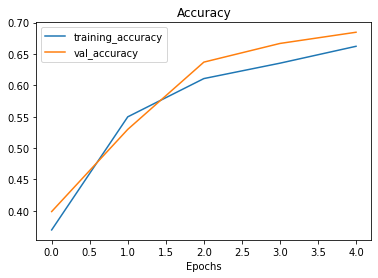

In [ ]:
plot_loss_curves(history_3)

In [ ]:
model_3.load_weights('/content/checkpoints/model_3.h5')

In [ ]:
model_3.evaluate(val_data)

31/31 [==============================] - 2s 39ms/step - loss: 0.8224 - accuracy: 0.6839


[0.8223916292190552, 0.6839237213134766]

In [ ]:
model_1.evaluate(val_data)

31/31 [==============================] - 1s 32ms/step - loss: 0.8025 - accuracy: 0.6757


[0.8025451898574829, 0.6757493019104004]

In [ ]:
model_2.evaluate(val_data)

31/31 [==============================] - 1s 33ms/step - loss: 0.9275 - accuracy: 0.6499


[0.9274612069129944, 0.6498637795448303]

### Model 4 : Modified with 10 epochs

model_3 being the best among the above models

In [ ]:
model_4 = tf.keras.models.clone_model(model_3)
model_4._name = 'model_4'

In [ ]:
model_4.name

'model_4'

In [ ]:
model_4.compile(loss = tf.keras.losses.categorical_crossentropy,
                optimizer = Adam(),
                metrics = ['accuracy'])

model_4.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 augmentation_layer (Sequent  (None, 224, 224, 3)      0         
 ial)                                                            
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      1283

> Create a reduce LR callback function

In [ ]:
from helper_functions import reduce_learning_rate_callback

In [ ]:
history_4 = model_4.fit(train_data,
                        epochs = 10,
                        steps_per_epoch = len(train_data),
                        validation_data = val_data,
                        validation_steps = int(0.25*len(val_data)),
                        callbacks = [create_model_checkpoint(model_name = model_4.name),reduce_learning_rate_callback(patience = 3)])

Epoch 1/10


123/123 [==============================] - 27s 147ms/step - loss: 1.3983 - accuracy: 0.3753 - val_loss: 1.2792 - val_accuracy: 0.4643 - lr: 0.0010
Epoch 2/10
123/123 [==============================] - 24s 158ms/step - loss: 1.2447 - accuracy: 0.4615 - val_loss: 1.2333 - val_accuracy: 0.4702 - lr: 0.0010
Epoch 3/10
123/123 [==============================] - 24s 146ms/step - loss: 1.1535 - accuracy: 0.5129 - val_loss: 1.3242 - val_accuracy: 0.4048 - lr: 0.0010
Epoch 4/10
123/123 [==============================] - 22s 146ms/step - loss: 1.1026 - accuracy: 0.5494 - val_loss: 1.2067 - val_accuracy: 0.5417 - lr: 0.0010
Epoch 5/10
123/123 [==============================] - 23s 146ms/step - loss: 1.0121 - accuracy: 0.6080 - val_loss: 1.0534 - val_accuracy: 0.5595 - lr: 0.0010
Epoch 6/10
123/123 [==============================] - 22s 146ms/step - loss: 0.9585 - accuracy: 0.6277 - val_loss: 0.9189 - val_accuracy: 0.6310 - lr: 0.0010
Epoch 7/10
123/123 [==============================] - 25s 146ms

In [ ]:
# Display the Hardware Resources - right now

print('Available GPU\n')

!nvidia-smi -L

print('\nAvailable RAM\n')

!cat /proc/meminfo | grep 'MemAvailable' | awk '{print $2/1024/1024 " GB"}'

Available GPU

GPU 0: Tesla T4 (UUID: GPU-84da5b19-6e7c-1bbc-0e8a-d46e309fb23e)

Available RAM

2.37258 GB


In [ ]:
clear_memory_tensorflow_session()

In [ ]:
# Display the Hardware Resources - right now

print('Available GPU\n')

!nvidia-smi -L

print('\nAvailable RAM\n')

!cat /proc/meminfo | grep 'MemAvailable' | awk '{print $2/1024/1024 " GB"}'

Available GPU

GPU 0: Tesla T4 (UUID: GPU-84da5b19-6e7c-1bbc-0e8a-d46e309fb23e)

Available RAM

5.08801 GB


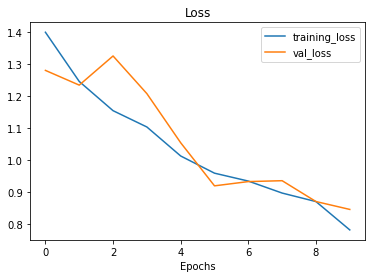

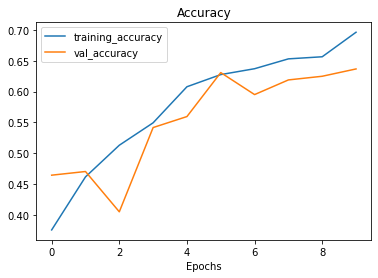

In [ ]:
plot_loss_curves(history_4)

In [ ]:
model_4.load_weights('/content/checkpoints/model_4.h5')

In [ ]:
model_4.evaluate(val_data)

31/31 [==============================] - 2s 42ms/step - loss: 0.8322 - accuracy: 0.6785


[0.8321777582168579, 0.6784741282463074]

In [ ]:
model_1.evaluate(val_data)

31/31 [==============================] - 1s 32ms/step - loss: 0.8025 - accuracy: 0.6757


[0.8025450110435486, 0.6757493019104004]

In [ ]:
model_2.evaluate(val_data)

31/31 [==============================] - 1s 33ms/step - loss: 0.9275 - accuracy: 0.6499


[0.9274613261222839, 0.6498637795448303]

In [ ]:
model_3.evaluate(val_data)

31/31 [==============================] - 1s 33ms/step - loss: 0.8224 - accuracy: 0.6839


[0.8223916292190552, 0.6839237213134766]

In [ ]:
model_4.save('best_model.h5')

In [ ]:
loaded_model = tf.keras.models.load_model('best_model.h5')
loaded_model.evaluate(val_data)

31/31 [==============================] - 2s 51ms/step - loss: 0.8322 - accuracy: 0.6785


[0.8321779370307922, 0.6784741282463074]

In [ ]:
clear_memory_tensorflow_session()

In [ ]:
# Display the Hardware Resources - right now

print('Available GPU\n')

!nvidia-smi -L

print('\nAvailable RAM\n')

!cat /proc/meminfo | grep 'MemAvailable' | awk '{print $2/1024/1024 " GB"}'

Available GPU

GPU 0: Tesla T4 (UUID: GPU-84da5b19-6e7c-1bbc-0e8a-d46e309fb23e)

Available RAM

6.69155 GB


--- End of the Notebook